In [1]:
import joblib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config
from sklearn.pipeline import Pipeline

set_config(transform_output="pandas")

In [2]:
# PATHS

DATA_PATH = "../data/interim/df_without_outliers.csv"

KMEANS_OBJ_PATH = "../models/mb_kmeans.joblib"
SCALER_OBJ_PATH = "../models/scaler.joblib"
ENCODER_OBJ_PATH = "../models/encoder.joblib"
MODEL_OBJ_PATH = "../models/model.joblib"

In [3]:
# Loading the data

df = pd.read_csv(DATA_PATH, usecols=["pickup_longitude", "pickup_latitude"])
df.shape

(33234199, 2)

In [4]:
# Loading the scaler and the model

scaler = joblib.load(SCALER_OBJ_PATH)
kmeans = joblib.load(KMEANS_OBJ_PATH)

In [5]:
scaler

StandardScaler()

In [6]:
kmeans

MiniBatchKMeans(n_clusters=30, n_init=20, random_state=42)

In [7]:
# Scaling the input data

df_scaled = scaler.transform(df)
df_scaled.head()

,pickup_longitude,pickup_latitude
0,-0.443778,-0.601549
1,-0.182839,-0.777271
2,-0.285388,-2.626699
3,-0.528059,-1.178462
4,0.365612,1.111533


In [8]:
# Get the cluster predictions

predictions = kmeans.predict(df_scaled.values)

In [9]:
# Adding the predictions to data

df["region"] = predictions
df.head()

,pickup_longitude,pickup_latitude,region
0,-73.990372,40.734695,7
1,-73.980782,40.729912,26
2,-73.984550,40.679565,9
3,-73.993469,40.718990,10
4,-73.960625,40.781330,8


In [10]:
# Forming a region group

region_grp = df.groupby("region")

In [11]:
# Sampling the data from each region

sampled_data = region_grp.sample(500, random_state=42)
sampled_data.shape

(15000, 3)

In [12]:
sampled_data

,pickup_longitude,pickup_latitude,region
3269108,-73.961357,40.806641,0
31107559,-73.949677,40.801151,0
4464996,-73.954544,40.805717,0
27828548,-73.960274,40.813190,0
9889390,-73.962280,40.805012,0
...,...,...,...
36922,-73.945114,40.745949,29
5793772,-73.943207,40.753162,29
5042014,-73.945404,40.745926,29
31688583,-73.936272,40.750038,29


In [13]:
# Value counts

sampled_data["region"].value_counts()

region
0     500
1     500
2     500
3     500
4     500
5     500
6     500
7     500
8     500
9     500
10    500
11    500
12    500
13    500
14    500
15    500
16    500
17    500
18    500
19    500
20    500
21    500
22    500
23    500
24    500
25    500
26    500
27    500
28    500
29    500
Name: count, dtype: int64

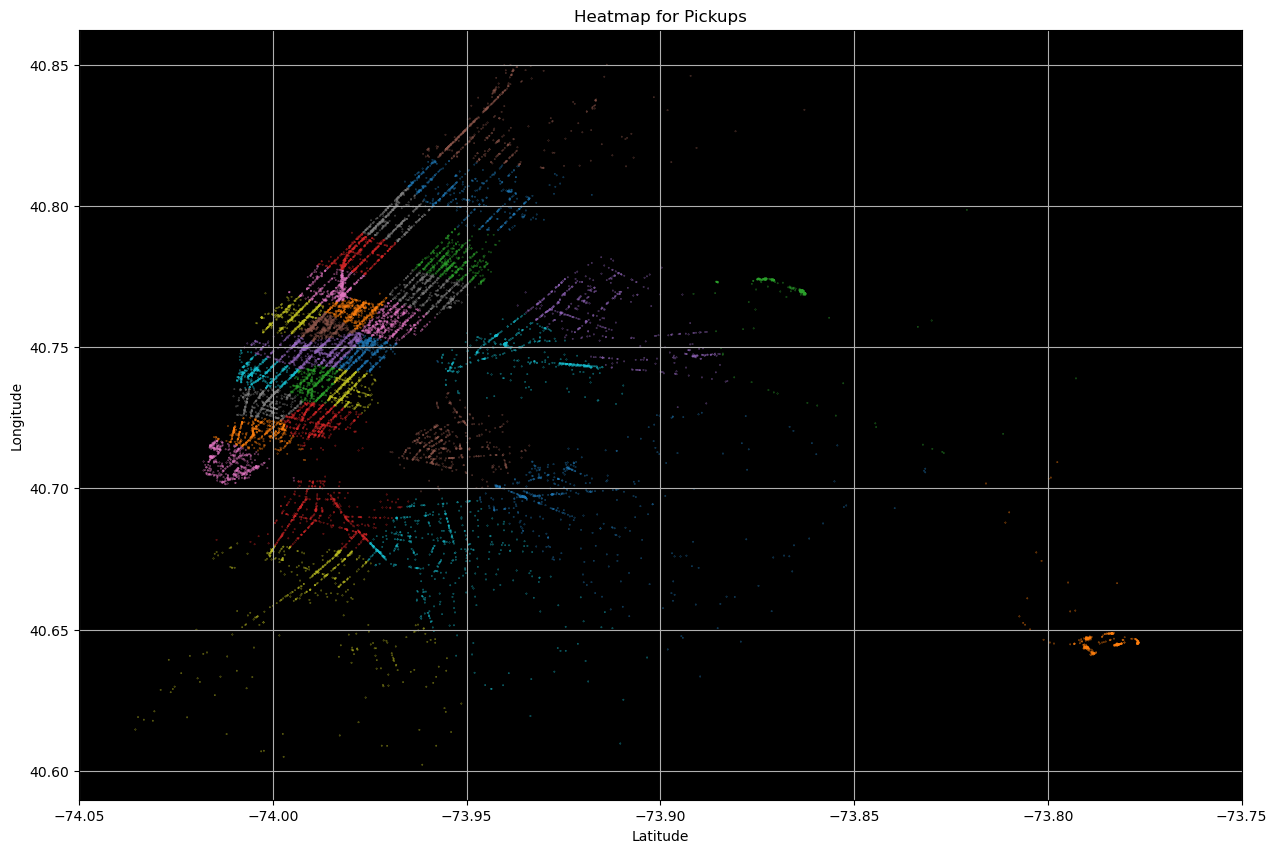

In [14]:
# Plotting the sampled data on scatterplot

fig, ax = plt.subplots(
    nrows=1, ncols=1, sharey=True, figsize=(15, 10)
)
ax.set_facecolor('k')
ax.set_xlim(left=-74.05, right=-73.75)
ax.scatter(
    sampled_data['pickup_longitude'],
    sampled_data['pickup_latitude'],
    s=0.05,
    c=sampled_data['region'],
    cmap='tab10'
)
ax.set_title('Heatmap for Pickups')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
plt.grid(True)
plt.show();

In [15]:
# Saving the sampled data

SAVE_PATH = "../data/external/plot_data.csv"
sampled_data.to_csv(SAVE_PATH, index=False)

In [16]:
# Loading the test data

TEST_DATA_PATH = "../data/processed/test.csv"
test_df = pd.read_csv(TEST_DATA_PATH, parse_dates=["tpep_pickup_datetime"]).set_index("tpep_pickup_datetime")
test_df

,region,total_pickups,avg_pickups,day_of_week,lag_1,lag_2,lag_3,lag_4
tpep_pickup_datetime,,,,,,,,
2016-03-01 00:00:00,0,41,39.0,1,36.0,44.0,31.0,29.0
2016-03-01 00:15:00,0,35,37.0,1,41.0,36.0,44.0,31.0
2016-03-01 00:30:00,0,47,41.0,1,35.0,41.0,36.0,44.0
2016-03-01 00:45:00,0,34,38.0,1,47.0,35.0,41.0,36.0
2016-03-01 01:00:00,0,30,35.0,1,34.0,47.0,35.0,41.0
...,...,...,...,...,...,...,...,...
2016-03-31 22:45:00,29,14,16.0,3,22.0,14.0,15.0,13.0
2016-03-31 23:00:00,29,17,16.0,3,14.0,22.0,14.0,15.0
2016-03-31 23:15:00,29,18,17.0,3,17.0,14.0,22.0,14.0


In [17]:
# Splitting the test data

X_test = test_df.drop(columns=["total_pickups"])
y_test = test_df["total_pickups"]

In [18]:
X_test

,region,avg_pickups,day_of_week,lag_1,lag_2,lag_3,lag_4
tpep_pickup_datetime,,,,,,,
2016-03-01 00:00:00,0,39.0,1,36.0,44.0,31.0,29.0
2016-03-01 00:15:00,0,37.0,1,41.0,36.0,44.0,31.0
2016-03-01 00:30:00,0,41.0,1,35.0,41.0,36.0,44.0
2016-03-01 00:45:00,0,38.0,1,47.0,35.0,41.0,36.0
2016-03-01 01:00:00,0,35.0,1,34.0,47.0,35.0,41.0
...,...,...,...,...,...,...,...
2016-03-31 22:45:00,29,16.0,3,22.0,14.0,15.0,13.0
2016-03-31 23:00:00,29,16.0,3,14.0,22.0,14.0,15.0
2016-03-31 23:15:00,29,17.0,3,17.0,14.0,22.0,14.0


In [19]:
y_test.head()

tpep_pickup_datetime
2016-03-01 00:00:00    41
2016-03-01 00:15:00    35
2016-03-01 00:30:00    47
2016-03-01 00:45:00    34
2016-03-01 01:00:00    30
Name: total_pickups, dtype: int64

In [20]:
# Loading the encoder and the model

encoder = joblib.load(ENCODER_OBJ_PATH)
model = joblib.load(MODEL_OBJ_PATH)

In [21]:
pipe = Pipeline([
    ("encoder", encoder),
    ("model", model)
])

pipe

Pipeline(steps=[('encoder',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['region', 'day_of_week'])])),
                ('model', LinearRegression())])

In [22]:
# Getting the predictions

predictions = pipe.predict(X_test)

In [23]:
# Sample input

sample_input = sampled_data.sample(1)
sample_input

,pickup_longitude,pickup_latitude,region
6615130,-73.982857,40.756813,15


In [24]:
# Scaling the coordinates of the sample input

scaled_sample_input = scaler.transform(sample_input.iloc[:, 0:2])
scaled_sample_input

,pickup_longitude,pickup_latitude
6615130,-0.239303,0.210921


In [25]:
# Distances of the sample input with each cluster center

distances = kmeans.transform(scaled_sample_input.values).values.ravel().tolist()
distances = list(enumerate(distances))
distances

[(0, 1.9509784957873177),
 (1, 0.3868958327683112),
 (2, 2.77735567835384),
 (3, 6.740759646078745),
 (4, 1.4890150432282543),
 (5, 0.23493432296404687),
 (6, 3.1422428231812654),
 (7, 0.7553864966598928),
 (8, 1.1769930022313277),
 (9, 2.4571241394230356),
 (10, 1.2236669567233813),
 (11, 0.9608312388965262),
 (12, 0.438520183413396),
 (13, 1.832915223226792),
 (14, 0.25685586174792885),
 (15, 0.11461575355775955),
 (16, 1.7083143894006754),
 (17, 2.788843078232754),
 (18, 0.3764529465566382),
 (19, 0.521398284591324),
 (20, 1.9102575305155403),
 (21, 0.7898634280741909),
 (22, 1.0993074075688969),
 (23, 1.4624879189997138),
 (24, 3.296303922315801),
 (25, 0.3317576785060793),
 (26, 0.7842958406365214),
 (27, 0.7943252502455339),
 (28, 2.951238148834004),
 (29, 1.3149378499734277)]

In [26]:
# Top-9 least distances

sorted(distances, key=lambda x: x[1])[0:9]

[(15, 0.11461575355775955),
 (5, 0.23493432296404687),
 (14, 0.25685586174792885),
 (25, 0.3317576785060793),
 (18, 0.3764529465566382),
 (1, 0.3868958327683112),
 (12, 0.438520183413396),
 (19, 0.521398284591324),
 (7, 0.7553864966598928)]

In [27]:
# Getting the indexes of the top-9 least distances

indexes = []

for ind in sorted(distances, key=lambda x: x[1])[0:9]:
    indexes.append(ind[0])

indexes

[15, 5, 14, 25, 18, 1, 12, 19, 7]